# Data visualization playground

- here we have a collection of scripts and algorithms used for visualizing data
- Linecuts, Slicing, fourier transforms, 3D to 1D conversions, etc.
- Much work done here before settling on the algorithms used for final visualization class

Text(0, 0.5, 'log(T)')

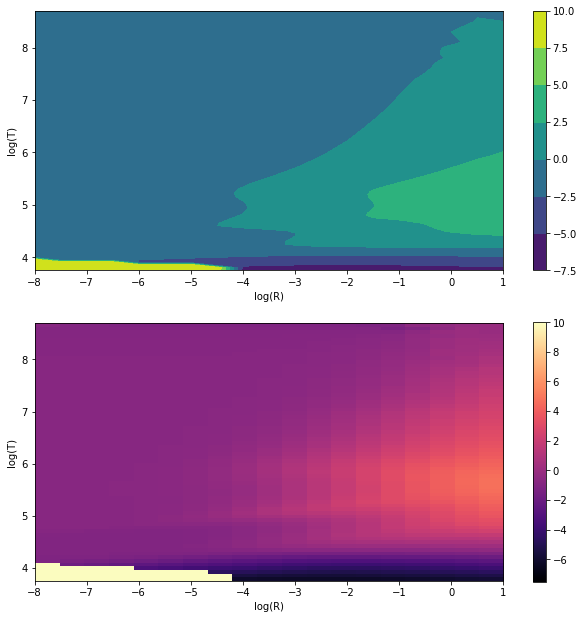

In [70]:
import gzip
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm

f = np.loadtxt('thing2.txt')
np.shape(f)
signal = f[1:72,1:21]
x = np.ravel(f[0:1,1:21])
y = np.ravel(f[1:72,0:1])
xx, yy = np.meshgrid(x,y)
fig, ax = plt.subplots(2)
fig.set_size_inches(10.5, 10.5)
plot = ax[0].contourf(x,y,signal,origin='lower')
fig.colorbar(plot, ax=ax[0])
ax[0].set_xlabel('log(R)')
ax[0].set_ylabel('log(T)')
plot = ax[1].imshow(signal, cmap = cm.magma, origin = 'lower', 
            extent = [min(x), max(x), min(y), max(y)],vmin=-7.5,vmax=10.0)
fig.colorbar(plot,ax=ax[1])
ax[1].set_xlabel('log(R)')
ax[1].set_ylabel('log(T)')

(-0.17, 0.17)

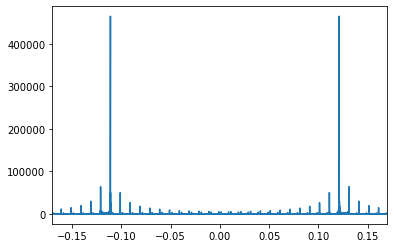

In [1]:
import scipy.fft
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import glob
xx=np.linspace(-3,3,100)
yy=np.linspace(-3,3,100)
zz=np.linspace(-3,3,100)
xX,yY,zZ=np.meshgrid(xx,yy,zz) #set up grid to plot function on
mat=np.exp(xX**2+yY**2+zZ**2) #plot the function
mat1=np.sin(4*np.pi*(xX+yY+zZ))
opt = scipy.fft.next_fast_len(len(mat1))
F=scipy.fft.fftn(mat1,(opt,opt,opt))
n=F.size
freq = scipy.fft.fftfreq(n)
#freq=freq.reshape(len(xx),len(yy),len(zz))
m1=np.ravel(np.abs(F))
plt.plot(freq,m1)
plt.xlim([-0.17,0.17])

In [8]:
np.mod(10,5)

0

(-2.2, 2.2)

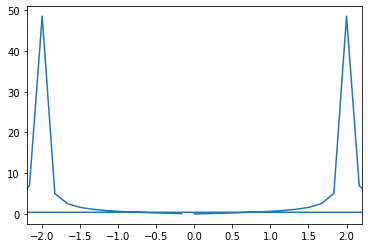

In [32]:
xx=np.linspace(-3,3,100)
S=np.sin(4*np.pi*xx)
F=scipy.fft.fftn(S)
n=F.size
freq=scipy.fft.fftfreq(n,6/100)
plt.plot(freq,np.abs(F))
plt.xlim([-2.2,2.2])

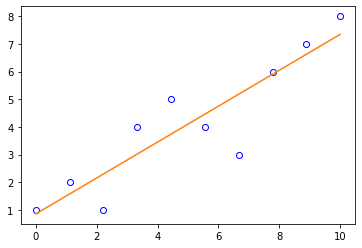

In [64]:
def func(x,args):
    m,b=args
    z=m*x+b
    return z
def res(args,x,y):
    return y-func(x,args)
r=np.linspace(0,10,10)
data=np.array([1,2,1,4,5,4,3,6,7,8])
guess=[1,2]
opt=least_squares(res,guess,args=(r,data))
fit = func(r,opt.x)
plt.plot(r,data,marker='o', mec='b', mfc='None', ls='None')
plt.plot(r,fit)

In [46]:
import random

from scipy.optimize import least_squares


a, b = random.randint(1, 1000), random.randint(1, 1000)
print("Expect", [a, b])

def f(args):
    x, y = args
    return (x-a)**2 + (y-b)**2

x0 = [-1, -3]

result = least_squares(fun=f, x0=x0)

print(result.x)

Expect [528, 708]
[528.00010441 708.00014035]


In [16]:
l=np.array([1,2,3,4,5,6,0,7,8,9])
print(-np.percentile(l,25,interpolation='midpoint')+np.percentile(l,75,interpolation='midpoint'))
print(-np.median(l[:5])+np.median(l[5:]))

4.0
4.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interpn

x=np.linspace(-2,2,40)
y=np.linspace(-2,2,40)
z=np.linspace(-2,2,40)
XX,YY,ZZ=np.meshgrid(x,y,z) #set up grid to plot function on
m=np.exp(-(XX**2+YY**2+ZZ**2)) #plot the function
m1=XX**3+YY**3+ZZ**3

In [47]:
#the resulting array m has its elements organized as such: One can choose elements from XX,YY,ZZ arrays and
#find the corresponding slots that hold these values in the original x,y,z arrays that were used to create
#the meshgrid. These positions tell you the element placement m['x spot']['y spot']['z spot'] 
#of the function's value with these three x,y,z values as input. Therefore, m is just a mixture of every 
#possible x,y,z element combinations.

#The resulting m array has elements organized such that each element's index i, j, k in m corresponds directly to 
#the indices which tell you the x, y, z coordinates of the function value, as found in the x, y, z arrays 
#used to create the meshgrid.

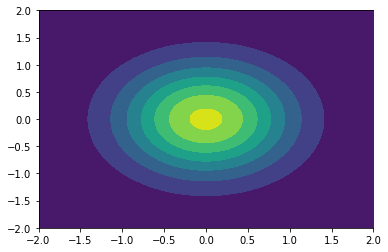

In [2]:
z1=m[:,:,25] #take a slice across the value of z at index on xy plane
plt.contourf(x,y,z1) #plot a contour of this slice

In [4]:
rarray=np.sqrt(XX**2+YY**2+ZZ**2) #find distance from origin values corresponding to each function value
rarray1=np.ravel(rarray) #put into form to plot
m1=np.ravel(m)

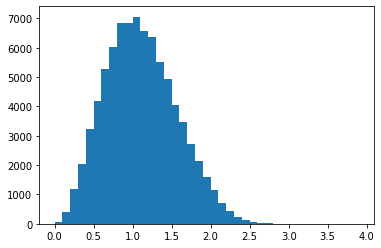

In [5]:
np.histogram(rarray1,weights=m1);
plt.hist(rarray1,bins=np.arange(0,4,0.1),weights=m1);
#how to know what bin size is appropriate?

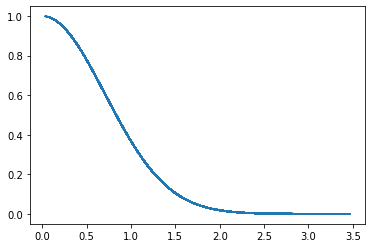

In [6]:
plt.plot(rarray1,m1)
plt.show()

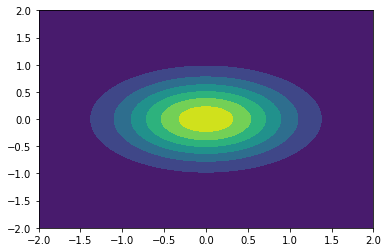

In [56]:
l=np.shape(m)
diags = np.diagonal(m, axis1=2, axis2=0).T #obtain diagonal array (always a 45 degree angle)
plt.contourf(x,y,diags) #plot a contour of this slice

In [19]:
a=np.array([[[1,2,3],[4,5,6],[20,21,22]],[[7,8,9],[10,11,12],[23,24,25]],[[13,14,15],[16,17,18],
                                                                          [26,27,28]]]) #test array

In [10]:
#A small function to return the diagonal of a 3D array with zi as
#the designation of how many units higher than the lower bound of z the diagonal should start
def up_diagonal(zi,arr):
    x=np.arange(0,arr.shape[0:3][0]-zi)
    z=np.arange(zi,arr.shape[0:3][2])
    return arr[x,:,z]

#another function to start a diagonal from the upper bound of z, downward diagonal
#zi defines the number of units lower than the upper bound you want the diagonal to start
def down_diagonal(zi,arr):
    x=np.arange(0,arr.shape[0:3][0]-zi)
    z=(np.arange(0,arr.shape[0:3][2]-zi))[::-1]
    return arr[x,:,z]

#How to take diagonals that are not always at 45 degrees?
#How to create a function which includes all possible diagonals that could be desired?

#takes value zi to start diagonal zi units from the lower bound of x
def up1_diagonal(zi,arr):
    x=np.arange(zi,arr.shape[0:3][0])
    z=np.arange(0,arr.shape[0:3][2]-zi)
    return arr[x,:,z]

In [23]:
#fucntion takes 2 points to define a normal vector, m as our 3Dmpdf function values, and theta as the tolerance
#level for points to be included in the slice.
#(p1 is the point which lies on the plane we want, p2 defines the direction of the normal vector to the plane)
def norm_slice(p1,p2,m,theta): 
    grid = np.zeros((len(x),len(y))) #grid to place values of mPDF on
    mvalues = [] #list to hold values of mPDF which are situated within our slice
    vec_n = p2 - p1; #create our normal vector
    for h in range((np.shape(m))[0]):
        for i in range((np.shape(m))[1]):
            for j in range((np.shape(m))[2]):
                p3 = np.array([x[h],x[i],x[j]]) #take each point x,y,z in 3Dmpdf
                vec_t = p3 - p1 #vector between point in question and point p1
                dot = np.sum(vec_n*vec_t,0) #dot product of two vectors
                vec_nm = np.sqrt(np.sum(vec_n**2,0)) #magnitudes of two vectors
                vec_tm = np.sqrt(np.sum(vec_t**2,0))
                mag_nt = vec_nm * vec_tm
                if mag_nt == 0: #make sure to not divide by zero
                    mag_nt = 1e+6
                phi = np.arccos(round(dot/mag_nt,5)) #calculate angle between two vector
                if abs(phi) <= (np.pi / 2) + abs(theta) and abs(phi) >= (np.pi / 2) - abs(theta): #if within tolerance, record the value on the grid
                    mvalues = np.append(mvalues,m[h][i][j])
                    grid[h,i] = grid[h][j] + m[h][i][j] #make sure to add onto preexisting values
    return grid

#This method does not weigh the tolerance correctly for each point in question. Ex: Points which define vectors along
#one another have the same angle with the normal vector, but different distances from the plane. 

In [4]:
#slices the function m according to the plane defined by the normal vector p2 - p1.
#the tol argument determines the size of the interval which allows for variation in the dot product
#the orien argument determines the orientation the slice is viewed in (1=xy plane,2=xz plane,3=yz plane) 
def norm_slice(p1,p2,m,tol,orien):
    if orien == 1:
        grid = np.zeros((len(x),len(y))) #grid to place values of mPDF on
    elif orien == 2:
        grid = np.zeros((len(x),len(z)))
    elif orien == 3:
        grid = np.zeros((len(y),len(z)))
    else:
        print('Invalid value entered for orien. Enter an integer: (1=xy plane, 2=xz plane, 3=yz plane)')
        return
    vec_n = p2 - p1; #create our normal vector
    #now we normalize this vector so that we can have a predictable tolerance
    vec_nm = np.sqrt(np.sum(vec_n**2,0))
    vec_nu = vec_n / vec_nm
    for i in range((np.shape(m))[0]):
        for j in range((np.shape(m))[1]):
            for k in range((np.shape(m))[2]):
                p3 = np.array([x[i],y[j],y[k]]) #take each point x,y,z on meshgrid
                vec_t = p3 - p1 #vector describing the test point
                dot = np.sum(vec_nu*vec_t,0) #dot product of two vectors
                if dot <= 0 + tol and dot >= 0 - tol: #if within tolerance, record the value on the grid
                    if orien == 1:
                        grid[i,j] = m[i][j][k] + grid[i][j] #xy plane view
                    elif orien == 2:
                        grid[i,k] = m[i][j][k] + grid[i][k] #xz plane view
                    else:
                        grid[j,k] = m[i][j][k] + grid[j][k] #yz plane view
    return grid

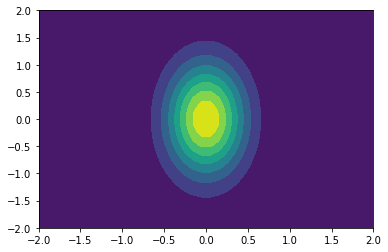

In [96]:
slice2 = norm_slice(np.array([0,0,0]),np.array([0,2,1]),m,0.1,1)
plt.contourf(x,y,slice2)

In [70]:
#slices the function m according to the plane that passes through the 3 points p1, p2, p3
#the tol argument determines the size of the interval which allows for variation in the determinant value
#the orien argument determines the orientation the slice is viewed in (1=xy plane,2=xz plane,3=yz plane) 
def three_points(p1,p2,p3,m,tol,orien):
    if orien == 1:
        grid = np.zeros((len(x),len(y))) #2D grid to place values of mPDF on
    elif orien == 2:
        grid = np.zeros((len(x),len(z)))
    elif orien == 3:
        grid = np.zeros((len(y),len(z)))
    else:
        print('Invalid value entered for orien. Enter an integer: (1=xy plane, 2=xz plane, 3=yz plane)')
        return
    x1 = p1[0] #extract the x,y,z values of p1,p2,p3
    y1 = p1[1]
    z1 = p1[2]
    x2 = p2[0]
    y2 = p2[1]
    z2 = p2[2]
    x3 = p3[0]
    y3 = p3[1]
    z3 = p3[2]
    #we will work through all points in the given function m, calculating determinants
    for i in range((np.shape(m))[0]):
        for j in range((np.shape(m))[1]):
            for k in range((np.shape(m))[2]):
                x_t = x[i] #test point coordinates
                y_t = y[j]
                z_t = z[k]
                mat = np.array([[x_t-x1,y_t-y1,z_t-z1],[x_t-x2,y_t-y2,z_t-z2],[x_t-x3,y_t-y3,z_t-z3]]) #matrix to calculate det of
                det = np.linalg.det(mat) #take the determinant
                if det <= 0 + tol and det >= 0 - tol: #if within tolerance, record value associated with test point
                    if orien == 1:
                        grid[i,j] = m[i][j][k] + grid[i][j] #xy plane view
                    elif orien == 2:
                        grid[i,k] = m[i][j][k] + grid[i][k] #xz plane view
                    else:
                        grid[j,k] = m[i][j][k] + grid[j][k] #yz plane view            
    return grid

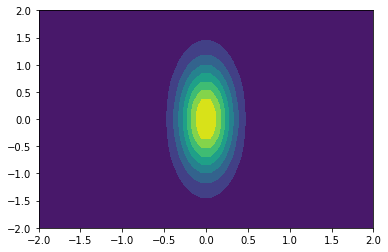

In [75]:
slice1 = three_points(np.array([0,0,0]),np.array([0,-1,3]),np.array([1,0,0]),m,0.3,1)
plt.contourf(x,y,slice1)

In [10]:
#takes XX,YY,ZZ, defined from meshgrid(x,y,z), and converts the meshgrid to 1D
#returns a flattened 3D array m along with the corresponding distance from origin array r
def convert_1D(XX,YY,ZZ,m):
    rarray=np.sqrt(XX**2+YY**2+ZZ**2) #make array of distances from origin r for each x,y,z point
    rarray1=np.ravel(rarray) #put into form to plot
    m1=np.ravel(m)
    return rarray1,m1

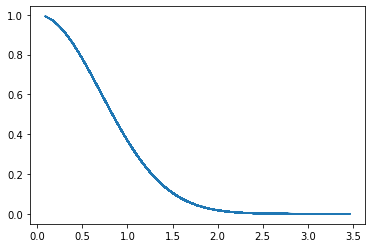

In [11]:
t = convert_1D(XX,YY,ZZ,m)
plt.plot(t[0],t[1])

In [77]:
np.array([1,2,3]).reshape(3,1)

array([[1],
       [2],
       [3]])

In [95]:
def masked_portion(p1,p2,m1,orien):
    A, B, C = np.meshgrid(x,y,z)
    print(np.shape(A.reshape(-1)))
    locations = np.array([A.reshape(-1), B.reshape(-1), C.reshape(-1)])
    print(np.shape(locations))
    dot = np.sum((p2-p1)*(locations-p1),1)
    if orien == 0:
        mask = (dot >= 0)
    if orien == 1:
        mask = (dot <= 0)
    cut_portion = mask*m1
    return cut_portion

In [96]:
masked_portion(np.array([0,0,0]),np.array([0,1,0]),m1,1)

(64000,)
(3, 64000)


ValueError: operands could not be broadcast together with shapes (3,64000) (3,) 

In [6]:
#takes points p1, p2, where a plane is described by the normal vector p2 - p1.
#takes 3D array m and cuts a portion out of it. The portion contains all points either on and above the defined plane
#or on and below it according to the argument orien (0=below plane,1=above plane)
def cut_portion(p1,p2,m1,orien):
    grid = np.zeros((len(x),len(y),len(z))) #3D grid to hold sliced values
    if orien != 0 and orien != 1:
        print('Invalid value entered for orien. Choose an integer (0 = portion below plane, 1 = portion above plane)')
        return
    vec_n = p2 - p1; #create our normal vector
    for i in range((np.shape(m))[0]):
        for j in range((np.shape(m))[1]):
            for k in range((np.shape(m))[2]):
                p3 = np.array([x[i],y[j],y[k]]) #take each point x,y,z on meshgrid
                vec_t = p3 - p1 #vector describing the test point
                dot = np.sum(vec_n*vec_t,0) #dot product of two vectors
                if orien == 0:
                    if dot <= 0:
                        grid[i,j,k] = m[i][j][k] + grid[i][j][k] #record value if on or below plane
                else:
                    if dot >= 0:
                        grid[i,j,k] = m[i][j][k] + grid[i][j][k] #record value if on or above plane
                        
    return grid

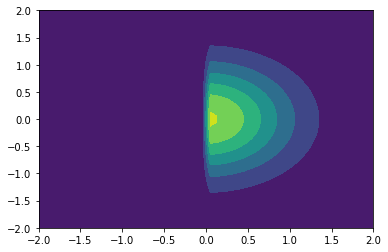

In [9]:
portion = cut_portion(np.array([0,0,0]),np.array([0,1,0]),m1,1)
slice0 = norm_slice(np.array([0,0,0]),np.array([0,0,1]),portion,0.5,1)
plt.contourf(x,y,slice0)

In [97]:
#now let's try using universal functions rather than iteration to slice
def univ_slice(p1,p2,m,tol,orien):
    XX,YY,ZZ = np.meshgrid(x,y,z) #create meshgrid
    if orien == 1:
        grid = np.zeros((len(x),len(y))) #grid to place values of mPDF on
    elif orien == 2:
        grid = np.zeros((len(x),len(z)))
    elif orien == 3:
        grid = np.zeros((len(y),len(z)))
    else:
        print('Invalid value entered for orien. Enter an integer: (1=xy plane, 2=xz plane, 3=yz plane)')
        return
    vec_n = p2 - p1; #create our normal vector
    #now we normalize this vector so that we can have a predictable tolerance
    vec_nm = np.sqrt(np.sum(vec_n**2,0))
    vec_nu = vec_n / vec_nm
    
    p3X = XX - p1[0] #calculate the coordinates for p3, or test point
    p3Y = YY - p1[1]
    p3Z = ZZ - p1[2]
    
    dot = p3X*vec_nu[0] + p3Y*vec_nu[1] + p3Z*vec_nu[2] #calculate dot product between normal vec and test vec
    for i in range((np.shape(dot))[0]):
        for j in range((np.shape(dot))[1]):
            for k in range((np.shape(dot))[2]):
                if dot[i,j,k] <= 0 + tol and dot[i,j,k] >= 0 - tol:
                    if orien == 1:
                        grid[i,j] = m[i][j][k] + grid[i][j] #xy plane view
                    elif orien == 2:
                        grid[i,k] = m[i][j][k] + grid[i][k] #xz plane view
                    else:
                        grid[j,k] = m[i][j][k] + grid[j][k] #yz plane view            
    return grid

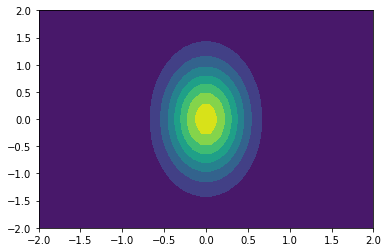

In [100]:
slice5 = univ_slice(np.array([0,0,0]),np.array([2,0,1]),m,0.2,1)
plt.contourf(x,y,slice5)

In [9]:
#credit to Shaw for helping with idea of code
#side_len: the side length of the square slice to be taken through the data
#res: resolution of our grid. Determines how many measurements per 1 unit length
#cen_pt: the center of our grid (1D numpy array of 3 values)
#norm_vec: determines the orientation of the plane, which is orthogonal to norm_vec (1D numpy array of 3 values)
#m: 3Dmpdf function values (3D array)
#circle: If true, side_len gives the radius of a circular region for which the slice will be taken. If false,
#the plane remains a square
def make_slice(side_len,res,p1,p2,p3,m,circle):
    
    #first find norm_vec from three points given
    #find two vectors from the three points which lie on the desired plane
    vec1 = p2 - p1
    vec2 = p3 - p1
    #now cross these two vectors to find a vector normal to the plane
    norm_vec = np.cross(vec1,vec2)
    
    #now calculate the centroid of the three points given
    x_pos = (p1[0]+p2[0]+p3[0])/3
    y_pos = (p1[1]+p2[1]+p3[1])/3
    z_pos = (p1[2]+p2[2]+p3[2])/3
    cen_pt = np.array([x_pos,y_pos,z_pos])
    
    #first ensure that our basis vector v1 is not the same as norm_vec
    v1 = np.array([1,0,0])
    if np.allclose(v1, norm_vec):
        v1 = np.array([0,1,0])
    
    #now make a matrix which will reflect any vector onto the orthogonal
    #complement of norm_vec, which is our desired plane
    m_norm = np.eye(3) - (np.outer(norm_vec, norm_vec.T) / norm_vec.T.dot(norm_vec))
    
    #now reflect v1 using m_norm
    v1 = m_norm.dot(v1)
    #and create a new vector v2 that is orthogonal to both v1 and norm_vec
    v2 = np.cross(norm_vec,v1)
    
    #we now have 2 vectors to form our plane
    
    #now create and normalize Q, which will transition our slice to
    #our desired plane
    Q = np.column_stack((v1, v2, np.zeros_like(v1)))
    Q[:,:2] /= np.linalg.norm(Q[:,:2], axis=0)
    
    #create an arbitrary grid
    a = np.linspace(-side_len/2, side_len/2, res*side_len)
    b = np.linspace(-side_len/2, side_len/2, res*side_len)
    
    A,B = np.meshgrid(a,b)
    
    locations = np.array([A.reshape(-1), B.reshape(-1), np.zeros(A.size)])
    
    #now move locations onto our two vectors
    locations = Q.dot(locations).T + cen_pt
    
    #for the circular slice, create a mask to only include points within a radius
    #equal to side_len
    dist = np.sqrt(np.sum((locations-cen_pt)**2,1))
    mask = (dist <= side_len / 2)
    masked_loc = locations[mask]
    
    #now we need to interpolate our 3Dmpdf function over this slice
    #first over the square slice
    points = (x,y,z)
    interp = interpn(points, m, locations)
    #and now over the circular slice
    masked_interp = mask*interp
    #and resize both to our grid shape
    square_slice = interp.reshape(len(a),len(b))
    circular_slice = masked_interp.reshape(len(a),len(b))
    if circle==True:
        plt.contourf(a,b,circular_slice)
    else:
        plt.contourf(a,b,square_slice)

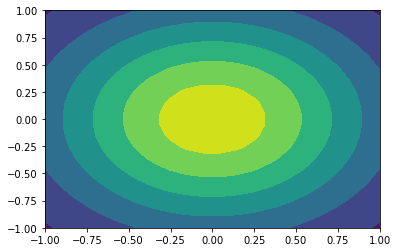

In [10]:
make_slice(2,100,np.array([-0.866, -0.5,0]),np.array([0.866, -0.5,0]),np.array([0,1,0]),m,False)

In [ ]:
#credit to Shaw for helping with idea of code
#side_len: the side length of the square slice to be taken through the data
#res: resolution of our grid. Determines how many measurements per 1 unit length
#cen_pt: the center of our grid (1D numpy array of 3 values)
#norm_vec: determines the orientation of the plane, which is orthogonal to norm_vec (1D numpy array of 3 values)
#m: 3Dmpdf function values (3D array)
#circle: If true, side_len gives the radius of a circular region for which the slice will be taken. If false,
#the plane remains a square
def make_slice1(side_len,res,cen_pt,norm_vec,m,circle):
    
    #first ensure that our basis vector v1 is not the same as norm_vec
    v1 = np.array([1,0,0])
    if np.allclose(v1, norm_vec):
        v1 = np.array([0,1,0])
    
    #now make a matrix which will reflect any vector onto the orthogonal
    #complement of norm_vec, which is our desired plane
    m_norm = np.eye(3) - (np.outer(norm_vec, norm_vec.T) / norm_vec.T.dot(norm_vec))
    
    #now reflect v1 using m_norm
    v1 = m_norm.dot(v1)
    #and create a new vector v2 that is orthogonal to both v1 and norm_vec
    v2 = np.cross(norm_vec,v1)
    
    #we now have 2 vectors to form our plane
    
    #now create and normalize Q, which will transition our slice to
    #our desired plane
    Q = np.column_stack((v1, v2, np.zeros_like(v1)))
    Q[:,:2] /= np.linalg.norm(Q[:,:2], axis=0)
    
    #create an arbitrary grid
    a = np.linspace(-side_len/2, side_len/2, res*side_len)
    b = np.linspace(-side_len/2, side_len/2, res*side_len)
    
    A,B = np.meshgrid(a,b)
    
    locations = np.array([A.reshape(-1), B.reshape(-1), np.zeros(A.size)])
    
    #now move locations onto our two vectors
    locations = Q.dot(locations).T + cen_pt
    
    #for the circular slice, create a mask to only include points within a radius
    #equal to side_len
    dist = np.sqrt(np.sum((locations-cen_pt)**2,1))
    mask = (dist <= side_len / 2)
    masked_loc = locations[mask]
    
    #now we need to interpolate our 3Dmpdf function over this slice
    #first over the square slice
    points = (x,y,z)
    interp = interpn(points, m, locations)
    #and now over the circular slice
    masked_interp = mask*interp
    #and resize both to our grid shape
    square_slice = interp.reshape(len(a),len(b))
    circular_slice = masked_interp.reshape(len(a),len(b))
    if circle==True:
        plt.contourf(a,b,circular_slice)
    else:
        plt.contourf(a,b,square_slice)

In [37]:
class visualize:
    """
    this class allows for a variety of methods to visualize the calculated 3Dmpdf. Requires both the 3Dmpdf
    array and the 3 arrays x, y, z from which the grid was created.
        
    """
        
    def __init__(self, m=[0], x=[0], y=[0], z=[0]):
        self.m = m
        self.x = x
        self.y = y
        self.z = z
    
    def make_slice(self, side_len=1, res=20, cen_pt=[0], norm_vec=[0], circular=False):
        
        """credit to Alex Shaw for code that creates the desired plane
        
        Args:
        
            side_len: the side length of the square slice to be taken through the data
            res: resolution of our grid. Determines how many measurements per 1 unit length
            cen_pt: the center of our grid (1D numpy array of 3 values)
            norm_vec: determines the orientation of the plane, which is orthogonal to norm_vec (1D numpy array of 3 values)
            circular: If True, will plot a circular slice rather than square
            
        Returns:
        
            Plots the desired slice through the input 3Dmpdf array

        """
        
        #first ensure that our basis vector v1 is not the same as norm_vec
        v1 = np.array([1,0,0])
        if np.allclose(v1, norm_vec):
            v1 = np.array([0,1,0])
    
        #now make a matrix which will reflect any vector onto the orthogonal
        #complement of norm_vec, which is our desired plane
        m_norm = np.eye(3) - (np.outer(norm_vec, norm_vec.T) / norm_vec.T.dot(norm_vec))
    
        #now reflect v1 using m_norm
        v1 = m_norm.dot(v1)
        #and create a new vector v2 that is orthogonal to both v1 and norm_vec
        v2 = np.cross(norm_vec,v1)
    
        #we now have 2 vectors to form our plane
    
        #now create and normalize Q, which will transition our slice to
        #our desired plane
        Q = np.column_stack((v1, v2, np.zeros_like(v1)))
        Q[:,:2] /= np.linalg.norm(Q[:,:2], axis=0)
    
        #create an arbitrary grid
        a = np.linspace(-side_len/2, side_len/2, res*side_len)
        b = np.linspace(-side_len/2, side_len/2, res*side_len)
    
        A,B = np.meshgrid(a,b)
    
        locations = np.array([A.reshape(-1), B.reshape(-1), np.zeros(A.size)])
    
        #now move locations onto our two vectors
        locations = Q.dot(locations).T + cen_pt
    
        #for the circular slice, create a mask to only include points within a radius
        #equal to side_len
        dist = np.sqrt(np.sum((locations-cen_pt)**2,1))
        mask = (dist <= side_len / 2)
        masked_loc = locations[mask]
    
        #now we need to interpolate our 3Dmpdf function over this slice
        points = (x,y,z)
        interp = interpn(points, m, locations)
        masked_interp = mask*interp
        square_slice = interp.reshape(len(a),len(b))
        circular_slice = masked_interp.reshape(len(a),len(b))
        
        if circular == True:
            plt.contourf(a,b,circular_slice)
        else:
            plt.contourf(a,b,square_slice)
    
    
    def cut_portion(self, p1=[0], p2=[0], orien=0):
        
        """
        Args:
        
            p1, p2: the desired plane is orthogonal to the normal vector p2 - p1.
            orien: determines which portion to keep. Enter 0 for above the plane, 1 for below
        
        Returns:
            
            Array containing all points on the designated plane, and all points either above or below this plane
        """
        
        grid = np.zeros((len(x),len(y),len(z))) #3D grid to hold sliced values
        if orien != 0 and orien != 1:
            print('Invalid value entered for orien. Choose an integer (0 = portion below plane, 1 = portion above plane)')
            return
        vec_n = p2 - p1; #create our normal vector
        for i in range((np.shape(m))[0]):
            for j in range((np.shape(m))[1]):
                for k in range((np.shape(m))[2]):
                    p3 = np.array([x[i],y[j],y[k]]) #take each point x,y,z on meshgrid
                    vec_t = p3 - p1 #vector describing the test point
                    dot = np.sum(vec_n*vec_t,0) #dot product of two vectors
                    if orien == 0:
                        if dot <= 0:
                            grid[i,j,k] = m[i][j][k] + grid[i][j][k] #record value if on or below plane
                    else:
                        if dot >= 0:
                            grid[i,j,k] = m[i][j][k] + grid[i][j][k] #record value if on or above plane
                        
        return grid
    
    
    def convert_1D(self):
        
        """
        takes XX,YY,ZZ, defined from meshgrid(x,y,z), and converts the meshgrid to 1D
        returns a flattened 3D array m along with the corresponding distance from origin array r
        """
        
        XX, YY, ZZ = meshgrid(x,y,z)
        rarray=np.sqrt(XX**2+YY**2+ZZ**2) #make array of distances from origin r for each x,y,z point
        rarray1=np.ravel(rarray) #put into form to plot
        m1=np.ravel(m)
        plt.plot(rarray1,m1)

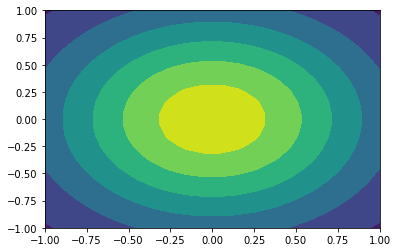

In [30]:
slice1=visualize(m,x,y,z)
slice1.make_slice(2,100,np.array([0,0,0]),np.array([1,0,0]))

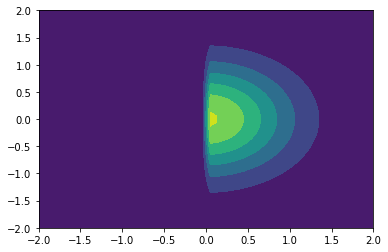

In [40]:
portion = slice1.cut_portion(np.array([0,0,0]),np.array([0,1,0]),1)
slice0 = norm_slice(np.array([0,0,0]),np.array([0,0,1]),portion,0.5,1)
plt.contourf(x,y,slice0)